In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# source = https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset
df = pd.read_csv("../data/customer_churn_dataset-training-master[1].csv")

# Overview of Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [4]:
# remove NA row
df = df[-df.Churn.isna()]

In [5]:
df.Churn.value_counts()

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64

<Axes: ylabel='count'>

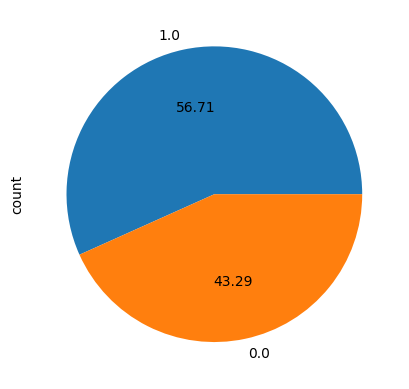

In [6]:
df.Churn.value_counts().plot.pie(autopct = '%.2f')

In [7]:
df = df.drop_duplicates(keep="first")

In [8]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [9]:
# convert columns to lowercase
df.columns = [x.lower() for x in df.columns]

In [10]:
# remove customerid column
df = df.drop(['customerid'], axis = 1)

In [11]:
df

,age,gender,tenure,usage frequency,support calls,payment delay,subscription type,contract length,total spend,last interaction,churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


# EDA (checking every columns)

<Axes: xlabel='age', ylabel='Count'>

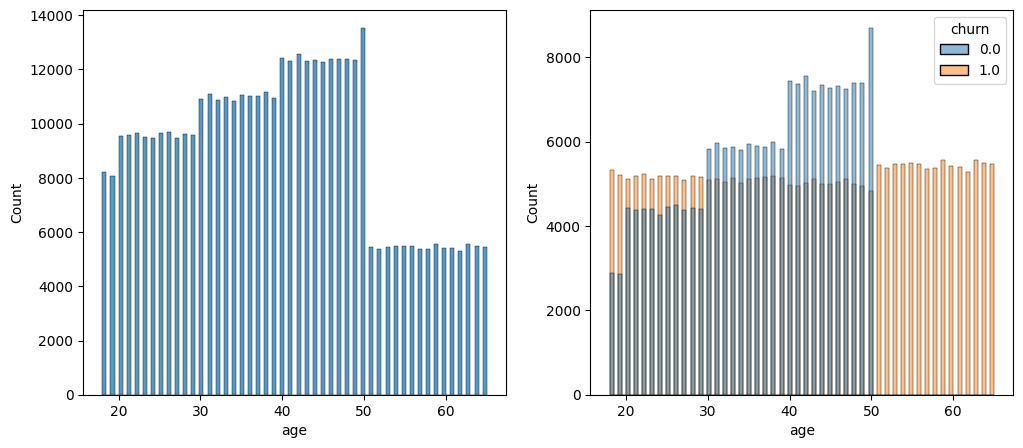

In [12]:
# age
fig, axs = plt.subplots(ncols = 2, figsize=(12, 5))
sns.histplot(df, x = "age", ax = axs[0])
sns.histplot(df, x = "age", hue = 'churn', ax = axs[1])

In [13]:
# as age increase up until 50, customers are less likely to churn
# customers above age 50 will definelty churn

In [14]:
df.groupby(['churn', 'age']).agg(counts = ("age", 'count')).unstack().fillna(0)

counts                                                                  \
age      18.0    19.0    20.0    21.0    22.0    23.0    24.0    25.0    26.0   
churn                                                                           
0.0    2896.0  2870.0  4430.0  4383.0  4400.0  4401.0  4271.0  4456.0  4506.0   
1.0    5323.0  5203.0  5123.0  5191.0  5239.0  5112.0  5194.0  5191.0  5186.0   

               ...                                                          \
age      27.0  ...    56.0    57.0    58.0    59.0    60.0    61.0    62.0   
churn          ...                                                           
0.0    4382.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1.0    5090.0  ...  5477.0  5361.0  5373.0  5573.0  5430.0  5407.0  5288.0   

                               
age      63.0    64.0    65.0  
churn                          
0.0       0.0     0.0     0.0  
1.0    5560.0  5496.0  5460.0  

[2 rows x 48 columns]

In [15]:
print(f"Mean: {df.age.mean().round(5)} Median: {df.age.median()}")

Mean: 39.37315 Median: 39.0


<Axes: xlabel='churn', ylabel='count'>

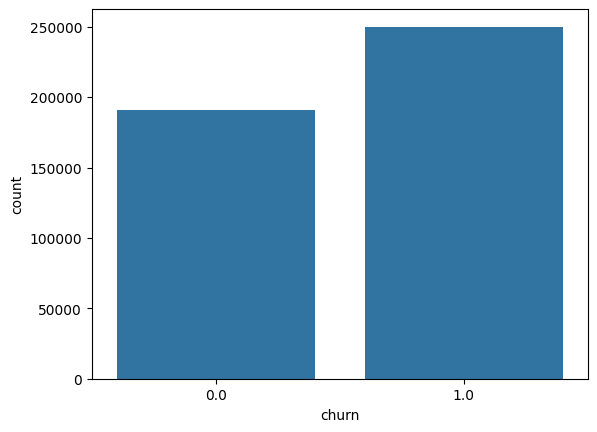

In [16]:
# churn
sns.countplot(df, x = "churn")

In [17]:
df.churn.value_counts()

churn
1.0    249999
0.0    190833
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

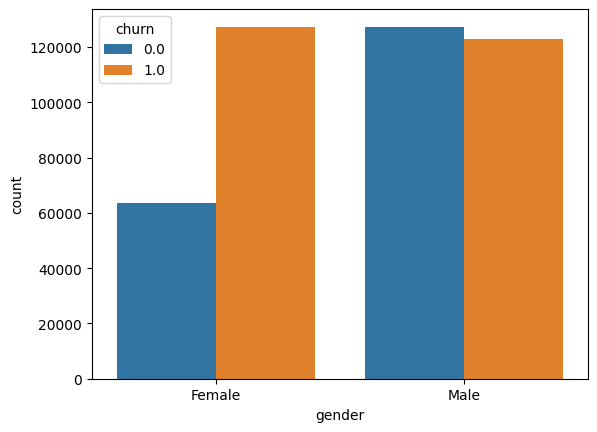

In [18]:
# gender
sns.countplot(df, x = 'gender', hue = 'churn')

In [19]:
# female are more likely to churn than male

<Axes: xlabel='tenure', ylabel='Count'>

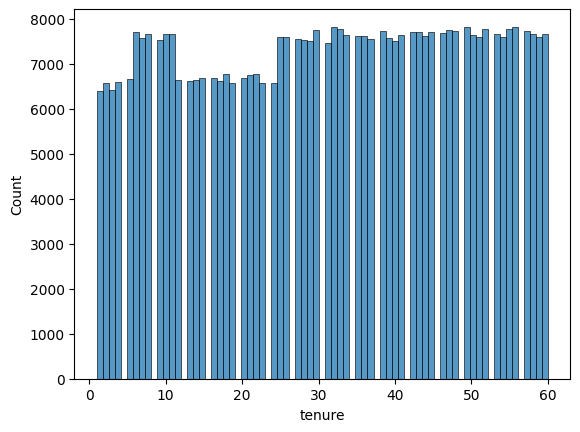

In [20]:
# tenure
sns.histplot(df,x = 'tenure')

<Axes: xlabel='usage frequency', ylabel='Count'>

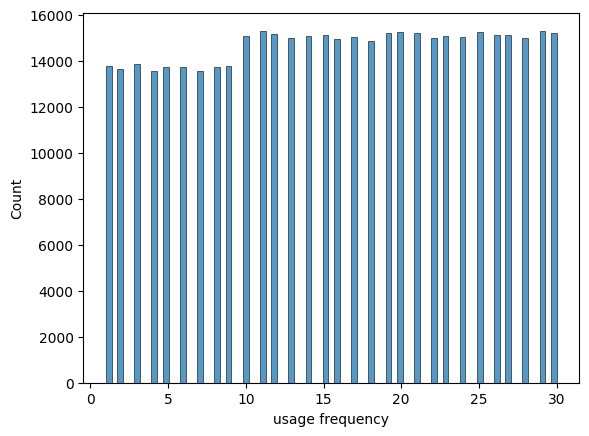

In [21]:
# usage frequency
sns.histplot(df, x = 'usage frequency')

<Axes: xlabel='total spend', ylabel='Count'>

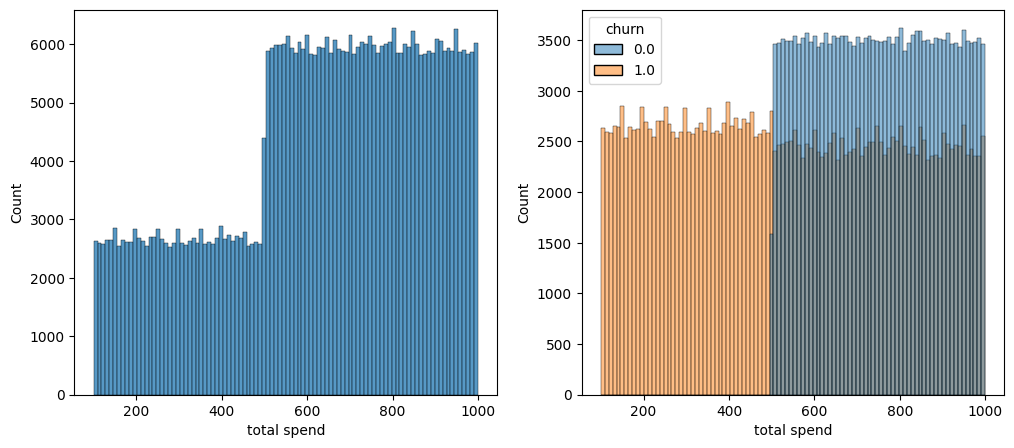

In [22]:
# total spend
figs, axs = plt.subplots(ncols = 2, figsize = (12,5))
sns.histplot(df, x = 'total spend', hue = 'churn', ax = axs [1])
sns.histplot(df, x = 'total spend', ax = axs [0])

In [23]:
# cusotmer who spend less more likely to churn

<Axes: xlabel='subscription type', ylabel='count'>

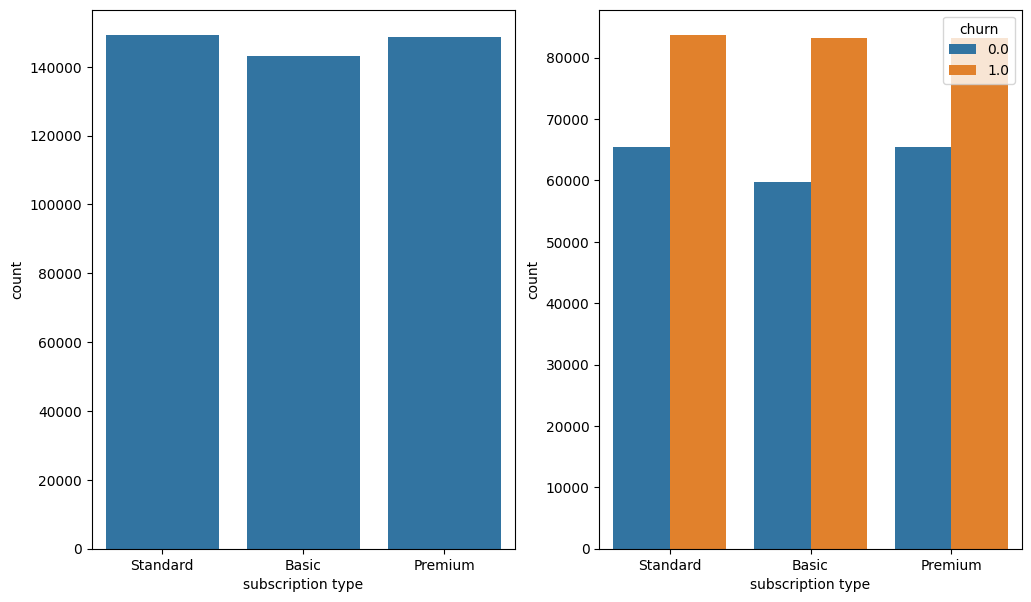

In [24]:
# subscription type
figs, axs = plt.subplots(ncols = 2, figsize = (12,7))
sns.countplot(df, x = 'subscription type', ax = axs[0])
sns.countplot(df, x = 'subscription type', hue = 'churn', ax = axs[1])

In [25]:
# no significant differnces between subscription types

<Axes: xlabel='contract length', ylabel='count'>

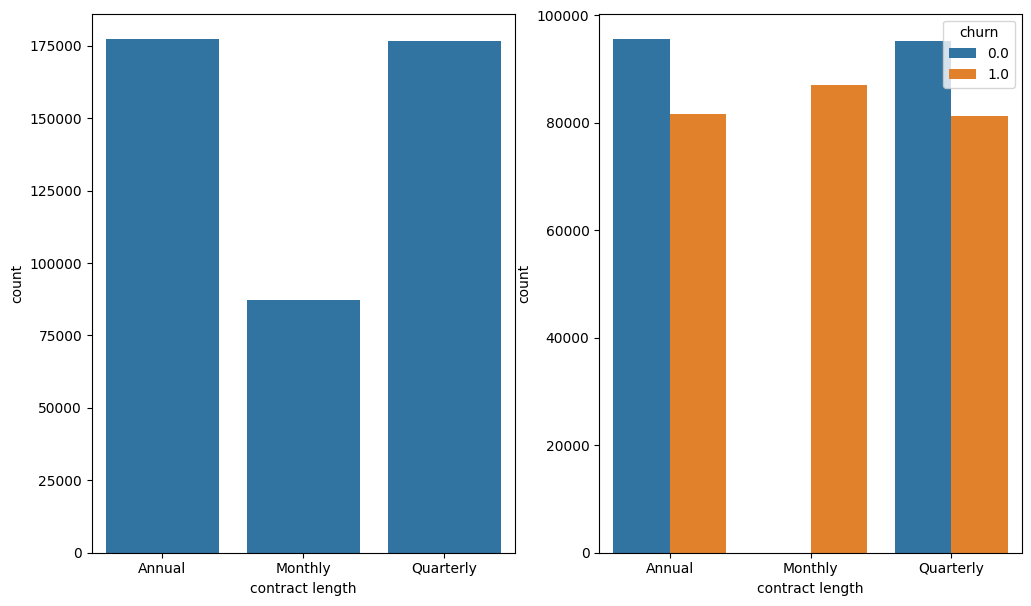

In [26]:
# contract length
figs, axs = plt.subplots(ncols = 2, figsize = (12,7))
sns.countplot(df, x = 'contract length', ax = axs[0])
sns.countplot(df, x = 'contract length', hue = 'churn', ax = axs[1])

In [27]:
# contract length monthly has all customers leaving entirely
# encode annual 3, quaterly 2, monthly 1 since annually is highest contract length

<Axes: xlabel='support calls', ylabel='Count'>

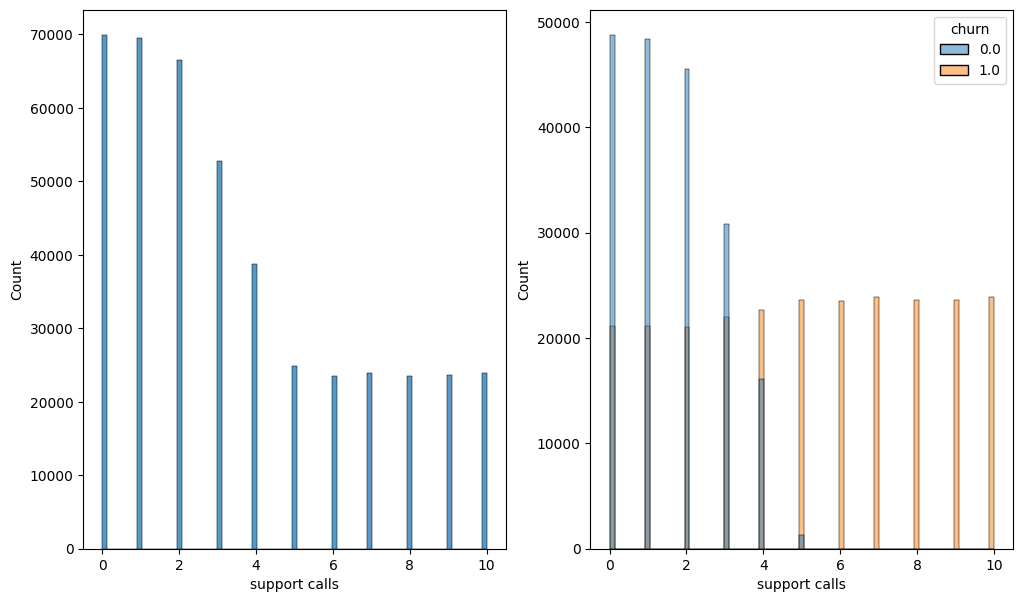

In [28]:
# support calls
figs, axs = plt.subplots(ncols = 2, figsize = (12,7))
sns.histplot(df, x = 'support calls', ax = axs[0])
sns.histplot(df, x = 'support calls', hue = 'churn', ax = axs[1])

In [29]:
# the higher the support calls the higher the chances of churn

<Axes: xlabel='payment delay', ylabel='Count'>

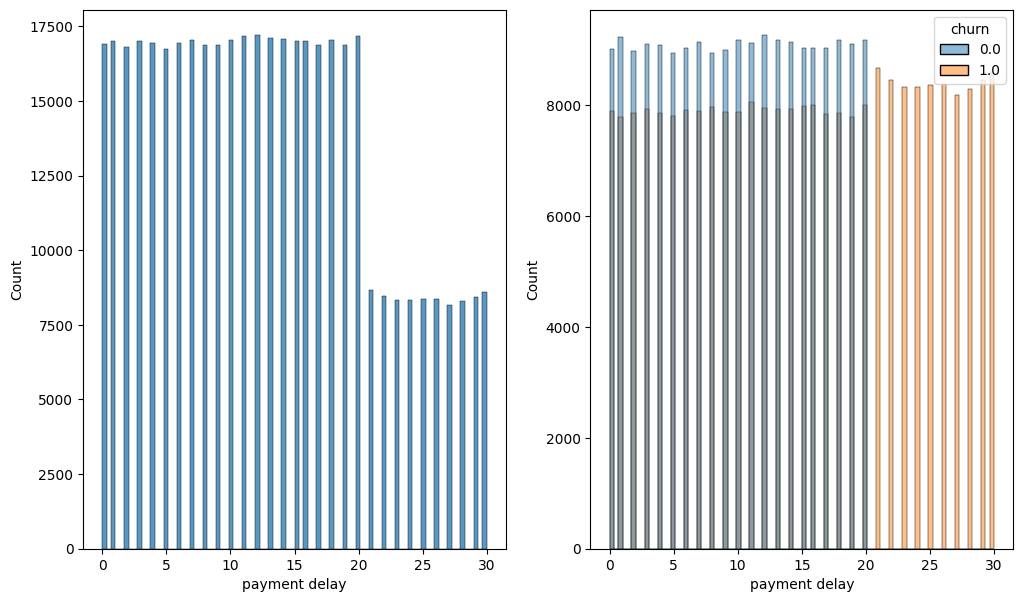

In [30]:
# payment delay
figs, axs = plt.subplots(ncols = 2, figsize = (12,7))
sns.histplot(df, x = 'payment delay', ax = axs[0])
sns.histplot(df, x = 'payment delay', hue = 'churn', ax = axs[1])

In [31]:
# payment delay > 20 shows complete customers churn 

<Axes: xlabel='last interaction', ylabel='Count'>

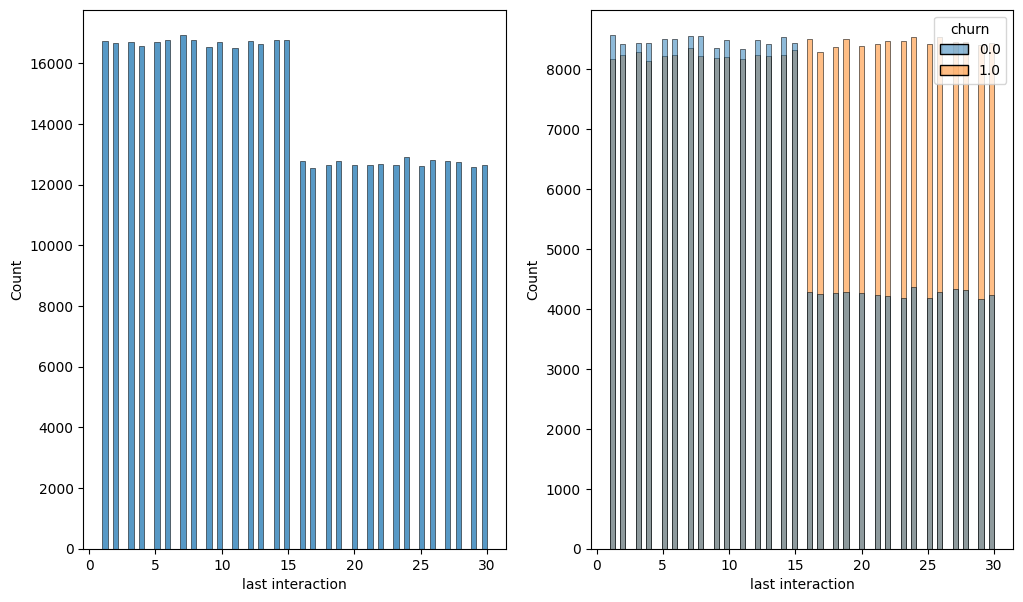

In [32]:
# last interaction
figs, axs = plt.subplots(ncols = 2, figsize = (12,7))
sns.histplot(df, x = 'last interaction', ax = axs[0])
sns.histplot(df, x = 'last interaction', hue = 'churn', ax = axs[1])

In [33]:
# last interaction with more than 15 has higher customer churning

# Feature Engineering


In [34]:
# remove space from column names
df.columns = [i.replace(" ","_") for i in df.columns]

In [35]:
df

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [36]:
# # map contract lenght based on duration, 3 for longest contract, 1 for shortest
# df.contract_length =  df.contract_length.map({'Annual':3, "Quarterly":2, "Monthly":1})

In [37]:
contract = pd.get_dummies(df.contract_length, prefix = 'contract', drop_first = True)
df = pd.concat([df, contract], axis = 1)
df = df.drop(['contract_length'], axis = 1)

In [38]:
# gender = pd.get_dummies(df.gender, prefix = "gender")
# df = pd.concat([df,gender], axis = 1)

In [39]:
df = df.drop(['gender'], axis = 1)
df

,age,tenure,usage_frequency,support_calls,payment_delay,subscription_type,total_spend,last_interaction,churn,contract_Monthly,contract_Quarterly
0,30.0,39.0,14.0,5.0,18.0,Standard,932.00,17.0,1.0,False,False
1,65.0,49.0,1.0,10.0,8.0,Basic,557.00,6.0,1.0,True,False
2,55.0,14.0,4.0,6.0,18.0,Basic,185.00,3.0,1.0,False,True
3,58.0,38.0,21.0,7.0,7.0,Standard,396.00,29.0,1.0,True,False
4,23.0,32.0,20.0,5.0,8.0,Basic,617.00,20.0,1.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,54.0,15.0,1.0,3.0,Premium,716.38,8.0,0.0,False,False
440829,25.0,8.0,13.0,1.0,20.0,Premium,745.38,2.0,0.0,False,False
440830,26.0,35.0,27.0,1.0,5.0,Standard,977.31,9.0,0.0,False,True
440831,28.0,55.0,14.0,2.0,0.0,Standard,602.55,2.0,0.0,False,True


In [40]:
# tenure , usage freqnuecy and subscription type showed no differences between customer churns
df = df.drop(['tenure', 'usage_frequency','subscription_type'], axis = 1)

In [41]:
df

,age,support_calls,payment_delay,total_spend,last_interaction,churn,contract_Monthly,contract_Quarterly
0,30.0,5.0,18.0,932.00,17.0,1.0,False,False
1,65.0,10.0,8.0,557.00,6.0,1.0,True,False
2,55.0,6.0,18.0,185.00,3.0,1.0,False,True
3,58.0,7.0,7.0,396.00,29.0,1.0,True,False
4,23.0,5.0,8.0,617.00,20.0,1.0,True,False
...,...,...,...,...,...,...,...,...
440828,42.0,1.0,3.0,716.38,8.0,0.0,False,False
440829,25.0,1.0,20.0,745.38,2.0,0.0,False,False
440830,26.0,1.0,5.0,977.31,9.0,0.0,False,True
440831,28.0,2.0,0.0,602.55,2.0,0.0,False,True


<Axes: >

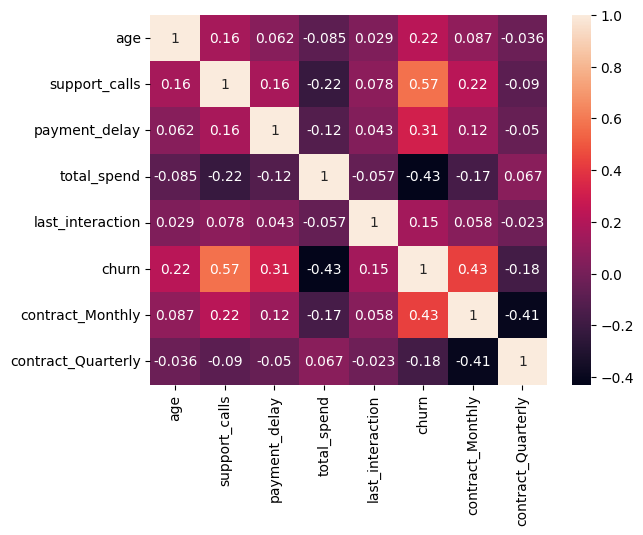

In [42]:
sns.heatmap(df.corr(), annot = True)

In [43]:
df = df.drop(['last_interaction','contract_Quarterly'], axis = 1)

In [44]:
df

,age,support_calls,payment_delay,total_spend,churn,contract_Monthly
0,30.0,5.0,18.0,932.00,1.0,False
1,65.0,10.0,8.0,557.00,1.0,True
2,55.0,6.0,18.0,185.00,1.0,False
3,58.0,7.0,7.0,396.00,1.0,True
4,23.0,5.0,8.0,617.00,1.0,True
...,...,...,...,...,...,...
440828,42.0,1.0,3.0,716.38,0.0,False
440829,25.0,1.0,20.0,745.38,0.0,False
440830,26.0,1.0,5.0,977.31,0.0,False
440831,28.0,2.0,0.0,602.55,0.0,False


# Model


In [45]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [46]:
X = df.drop('churn', axis = 1)
y = df.churn

rus = RandomUnderSampler(sampling_strategy= 'majority')
X, y = rus.fit_resample(X,y)

churn
0.0    190833
1.0    190833
Name: count, dtype: int64


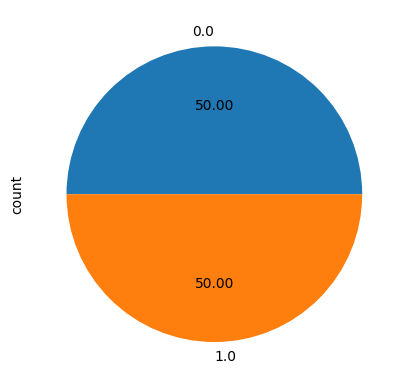

In [47]:
y.value_counts().plot.pie(autopct = '%.2f')
print(y.value_counts())

In [48]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state =123)

logreg = LogisticRegression()

In [49]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [50]:
y_pred = logreg.predict(x_test)

In [51]:
# initial accuracy = 89%
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90     61005
         1.0       0.86      0.92      0.89     53495

    accuracy                           0.89    114500
   macro avg       0.89      0.89      0.89    114500
weighted avg       0.89      0.89      0.89    114500



# Improve Model Performance


In [52]:
print(f"Sum of rows with payment delay > 20                     : {len(df.loc[(df.payment_delay > 20), "churn"].to_list())}")
print(f"Sum of rows with customer churn 1, payment_delay > 20   : {df.loc[(df.payment_delay > 20), "churn"].sum()}")

Sum of rows with payment delay > 20                     : 84030
Sum of rows with customer churn 1, payment_delay > 20   : 84030.0


In [53]:
# can conclude that customers with payment delay more than 20 will definetely churn company

In [54]:
long_delays = pd.DataFrame([1 if i > 20 else 0 for i in df.payment_delay], columns = ["long_delays"])

In [55]:
# concat the new column and drop the old one
df = pd.concat([df.reset_index(drop= True), long_delays.reset_index(drop= True)], axis = 1)

In [56]:
df = df.drop(['payment_delay'], axis = 1)

In [57]:
df

,age,support_calls,total_spend,churn,contract_Monthly,long_delays
0,30.0,5.0,932.00,1.0,False,0
1,65.0,10.0,557.00,1.0,True,0
2,55.0,6.0,185.00,1.0,False,0
3,58.0,7.0,396.00,1.0,True,0
4,23.0,5.0,617.00,1.0,True,0
...,...,...,...,...,...,...
440827,42.0,1.0,716.38,0.0,False,0
440828,25.0,1.0,745.38,0.0,False,0
440829,26.0,1.0,977.31,0.0,False,0
440830,28.0,2.0,602.55,0.0,False,0


In [58]:
# customer with age > 50 will definetely churn

In [59]:
older_cust = pd.DataFrame([1 if i > 50 else 0 for i in df.age], columns = ["old_customer"])

In [60]:
df = pd.concat([df.reset_index(drop= True), older_cust.reset_index(drop= True)], axis = 1)

In [61]:
df = df.drop(['age'], axis = 1)

In [62]:
df

,support_calls,total_spend,churn,contract_Monthly,long_delays,old_customer
0,5.0,932.00,1.0,False,0,0
1,10.0,557.00,1.0,True,0,1
2,6.0,185.00,1.0,False,0,1
3,7.0,396.00,1.0,True,0,1
4,5.0,617.00,1.0,True,0,0
...,...,...,...,...,...,...
440827,1.0,716.38,0.0,False,0,0
440828,1.0,745.38,0.0,False,0,0
440829,1.0,977.31,0.0,False,0,0
440830,2.0,602.55,0.0,False,0,0


# Model performance after further feature engineering

In [63]:
# Logistic Regression
X = df.drop('churn', axis = 1)
y = df.churn

rus = RandomUnderSampler(sampling_strategy= 'majority')
X, y = rus.fit_resample(X,y)

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state =123)

logreg.fit(X_train, y_train)

LogisticRegression()

In [64]:
y_pred = logreg.predict(x_test)

In [65]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95     60321
         1.0       0.92      0.98      0.95     54179

    accuracy                           0.95    114500
   macro avg       0.95      0.95      0.95    114500
weighted avg       0.95      0.95      0.95    114500



In [66]:
# 95% accuracy on Logistic Regression Model

# Dump model



In [67]:
import joblib
joblib.dump(logreg, '../customer_churn.joblib')

['../customer_churn.joblib']